# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## You model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [0]:
##### Your Code Here #####
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [77]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [78]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [79]:
df_1 = df.drop(['LotFrontage', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Alley'], axis=1)
df_1.isna().sum().sum()

17

In [80]:
df_1 = df_1.fillna(method='bfill')
df_1.isna().sum().sum()

0

In [0]:
from sklearn.preprocessing import LabelEncoder

#Auto encodes any dataframe column of type category or object.
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

In [82]:
dummyEncode(df_1)
df_1.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,706,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,548,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,978,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,2,460,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,486,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,2,608,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,216,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,3,642,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,655,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,3,836,2,192,84,0,0,0,0,0,12,2008,8,4,250000


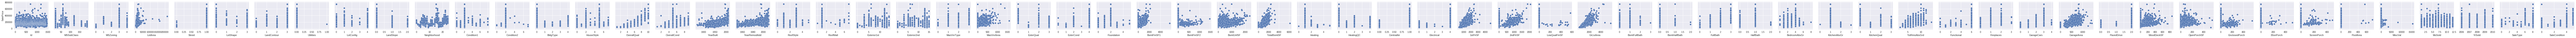

In [83]:
# Generate a list of column headers not including price
x_columns = df_1.columns.drop('SalePrice')

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=df_1, y_vars=['SalePrice'], x_vars=x_columns)

In [0]:
df_1['ln_price'] = np.log(df_1['SalePrice'])

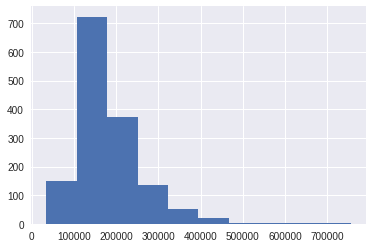

In [85]:
df_1.SalePrice.hist()

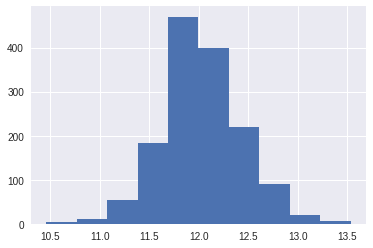

In [86]:
df_1.ln_price.hist()

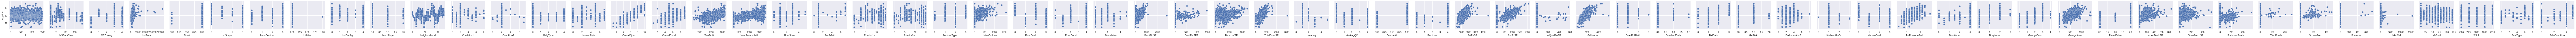

In [87]:
# Generate a list of column headers not including price
x_columns = df_1.columns.drop(['SalePrice', 'ln_price'])

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=df_1, y_vars=['ln_price'], x_vars=x_columns)

In [101]:
len(df_1.columns)

76

## Regression Prior to Feature Engineering + Post-transformed SalesPrice

In [89]:
y = df_1.loc[:, ['ln_price']].values

X = df_1.loc[:, ['Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 
'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
'Exterior1st', 'Exterior2nd', 'ExterQual', 'BsmtUnfSF', 
'HeatingQC', 'ExterCond','1stFlrSF', '2ndFlrSF', 
'KitchenQual', 'TotRmsAbvGrd','GarageCars', 'GarageArea', 
'MoSold', 'YrSold', 'SaleType', 'SaleCondition']].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

RMSE is 0.14604838865951053
R^2 is 0.8768179445816898
coefficients:  [ 1.34032555e-03  6.00505600e-04 -2.87023665e-02 -7.29147845e-03
  9.07706485e-02  4.65213391e-02  3.19525238e-03  7.71880385e-04
 -4.40630062e-03  2.04387951e-03 -5.20713871e-03 -7.24902080e-05
 -7.92970060e-03  1.44535155e-02  3.27809535e-04  2.09179301e-04
 -2.10312906e-02  5.83898399e-03  9.71614484e-02 -3.67023402e-05
  3.84711572e-05 -2.95687717e-03  8.25880621e-04  1.45565731e-02]
intercepts:  [8.7103529]


##  "Engineering" a new grade_squared feature (_OverallQual_ & _GrLivArea_)

First we'll fit a regular bivariate regression line and calculate its $R^2$ to get a baseline. Since we want to know if this generated feature is improving our model or not we'll first run our code without it so that we have something to compare to. 

$price_i = \beta_0 + \beta_1overallqual_i + \epsilon_i$

In [90]:
# Separate dependent and independent variables
y = df_1.loc[:, ['SalePrice']].values
X = df_1.loc[:, ['OverallQual']].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.25, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

RMSE is 49584.41777916812
R^2 is 0.6490355431673547


$price_i = \beta_0 + \beta_1OverallCond_i + \epsilon_i$

In [91]:
# Separate dependent and independent variables
y = df_1.loc[:, ['SalePrice']].values
X = df_1.loc[:, ['OverallCond']].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.25, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

RMSE is 83483.10907926377
R^2 is 0.00512176558250288


## Lets try fitting grade_squared as a bivariate model

In [92]:
df_1['OverallQual_squared'] = df_1['OverallQual']**2
df_1['OverallCond_squared'] = df_1['OverallCond']**2
df_1.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ln_price,OverallQual_squared,OverallCond_squared
0,1,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,706,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,548,2,0,61,0,0,0,0,0,2,2008,8,4,208500,12.247694,49,25
1,2,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,978,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,2,460,2,298,0,0,0,0,0,0,5,2007,8,4,181500,12.109011,36,64
2,3,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,486,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,2,608,2,0,42,0,0,0,0,0,9,2008,8,4,223500,12.317167,49,25
3,4,70,3,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,216,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,3,642,2,0,35,272,0,0,0,0,2,2006,8,0,140000,11.849398,49,25
4,5,60,3,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,655,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,3,836,2,192,84,0,0,0,0,0,12,2008,8,4,250000,12.429216,64,25


$price_i = \beta_0 + \beta_1overallqual^{2}_i + \epsilon_i$

In [93]:
# Separate dependent and independent variables
y = df_1.loc[:, ['SalePrice']].values
X = df_1.loc[:, ['OverallQual_squared']].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

RMSE is 46718.27413146682
R^2 is 0.6798588731848346


$price_i = \beta_0 + \beta_1OverallCond^{2}_i + \epsilon_i$

In [94]:
# Separate dependent and independent variables
y = df_1.loc[:, ['SalePrice']].values
X = df_1.loc[:, ['OverallCond_squared']].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

RMSE is 82219.8235168814
R^2 is 0.008435503227401053


## Multiple Regression using both grade and grade_squred

$price_i = \beta_0 + \beta_1 overallqual_i + \beta_2 overallqual^{2}_i + \epsilon_i$

In [95]:
# Separate dependent and independent variables
y = df_1.loc[:, ['SalePrice']].values
X = df_1.loc[:, ['OverallQual', 'OverallQual_squared']].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

RMSE is 45958.17481485261
R^2 is 0.6901914255426906


$price_i = \beta_0 + \beta_1 OverallCond_i + \beta_2 OverallCond^{2}_i + \epsilon_i$

In [96]:
# Separate dependent and independent variables
y = df_1.loc[:, ['SalePrice']].values
X = df_1.loc[:, ['OverallCond', 'OverallCond_squared']].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

RMSE is 81777.93444820281
R^2 is 0.019065155480514462


## Engineering Additional Features (8 more)

In [0]:
df_1['Age'] = df_1['YrSold'] - df_1['YearBuilt']
df_1['YardArea'] = df_1['LotArea'] - (df_1['GrLivArea'] + df_1['TotalBsmtSF'] + df_1['GarageArea'])
df_1['SFperRoom'] = (df_1['GrLivArea'] + df_1['TotalBsmtSF']) /  (df_1['TotRmsAbvGrd'] + (df_1['HalfBath']*0.5) + df_1['FullBath'] + df_1['BsmtHalfBath']*0.5 + df_1['BsmtFullBath'])
df_1['ChillArea'] = df_1['PoolArea'] + df_1['ScreenPorch'] + df_1['WoodDeckSF'] + df_1['OpenPorchSF'] + df_1['EnclosedPorch'] + df_1['3SsnPorch']
df_1['ConditionQualityRate'] = df_1['OverallCond'] /( df_1['OverallQual']+1)
df_1['NeighborhoodCond'] = (df_1['Neighborhood']+1) * (df_1['Condition1']+1 )* (df_1['Condition2']+1)
df_1['ClassZone'] = df_1['MSSubClass'] * (df_1['MSZoning']+1) 
df_1['LandCondition'] = df_1['LotShape'] + df_1['LandContour'] + df_1['LotConfig'] + df_1['LandSlope']

In [102]:
df_1.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ln_price,OverallQual_squared,OverallCond_squared,Age,YardArea,SFperRoom,ChillArea,ConditionQualityRate,NeighborhoodCond,ClassZone,LandCondition
0,1,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,706,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,548,2,0,61,0,0,0,0,0,2,2008,8,4,208500,12.247694,49,25,5,5336,223.130435,61,0.625000,54,240,10
1,2,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,978,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,2,460,2,298,0,0,0,0,0,0,5,2007,8,4,181500,12.109011,36,64,31,6616,296.941176,298,1.142857,150,80,8
2,3,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,486,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,2,608,2,0,42,0,0,0,0,0,9,2008,8,4,223500,12.317167,49,25,7,7936,284.842105,42,0.625000,54,240,7
3,4,70,3,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,216,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,3,642,2,0,35,272,0,0,0,0,2,2006,8,0,140000,11.849398,49,25,91,6435,274.777778,307,0.625000,63,280,3
4,5,60,3,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,655,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,3,836,2,192,84,0,0,0,0,0,12,2008,8,4,250000,12.429216,64,25,8,10081,267.440000,276,0.555556,144,240,5


## Engineered Model

In [103]:
# Feature Engineered Model
# Separate dependent and independent variables
y = df_1.loc[:, ['ln_price']].values

X = df_1.loc[:, ['Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 
'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
'Exterior1st', 'Exterior2nd', 'ExterQual', 'BsmtUnfSF', 
'HeatingQC', 'ExterCond','1stFlrSF', '2ndFlrSF', 
'KitchenQual', 'TotRmsAbvGrd','GarageCars', 'GarageArea', 
'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'OverallQual_squared',
'OverallCond_squared', 'Age', 'YardArea', 'SFperRoom', 'ChillArea',
'ConditionQualityRate', 'NeighborhoodCond', 'ClassZone', 'LandCondition']].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

RMSE is 0.13733267542680702
R^2 is 0.8910814958049826
coefficients:  [ 2.83463114e-03  9.27159002e-03 -6.90434358e-03 -5.10856709e-04
  6.45303872e-02  1.17348767e-01  1.25345396e-03  9.81048655e-04
 -5.47760699e-03  3.17906174e-03 -5.29905067e-03 -1.08291543e-04
 -9.40201256e-03  7.27876122e-03  9.03532853e-05  8.61691235e-05
 -2.63108053e-02  5.28746281e-02  9.60669643e-02 -5.26391718e-05
 -1.76584692e-04 -5.64323699e-04 -8.41346062e-06  1.82677245e-02
  4.13171694e-04 -4.79522992e-03 -1.81777766e-03  2.36491094e-06
  1.20858484e-03  1.23263041e-04 -1.13228766e-01 -2.40803295e-04
 -1.24527327e-04 -1.98008638e-03]
intercepts:  [7.06606258]


# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Start studying for tomorrow's topic: Gradient Descent
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data